In [1]:
import torch
import torchaudio
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

In [20]:

path = os.path.join("..", "..", "data", "MagnaTagATune", "samples", "train", "0", "american_bach_soloists-j_s__bach__cantatas_volume_v-01-gleichwie_der_regen_und_schnee_vom_himmel_fallt_bwv_18_i_sinfonia-117-146.npy")

In [64]:
data = np.load(path)
waveform = torch.tensor(data, dtype=torch.float32)
print(waveform.shape)
spectrogram = torchaudio.transforms.MelSpectrogram(n_mels=128)(waveform)
print(spectrogram.shape)
print(spectrogram)

np.save("spectrogram.npy", spectrogram)

torch.Size([349500])
torch.Size([128, 1748])
tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.1491e-02, 1.6332e+02, 1.2032e+03,  ..., 1.0711e+05, 5.9732e+00,
         0.0000e+00],
        [1.6956e-01, 8.7938e+02, 6.4784e+03,  ..., 5.7668e+05, 3.2161e+01,
         0.0000e+00],
        ...,
        [2.6685e-03, 4.6748e+01, 5.0914e+02,  ..., 1.3341e+04, 1.3014e+01,
         0.0000e+00],
        [5.0960e-03, 4.5821e+01, 2.8284e+02,  ..., 3.6168e+03, 1.9371e+01,
         0.0000e+00],
        [2.8281e-03, 5.1368e+01, 1.4783e+02,  ..., 4.0200e+03, 3.5301e+00,
         0.0000e+00]])


/usr/local/lib/python3.10/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


In [37]:
def plot_waveform(waveform, sr, title="Waveform", ax=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    if ax is None:
        _, ax = plt.subplots(num_channels, 1)
    ax.plot(time_axis, waveform[0], linewidth=1)
    ax.grid(True)
    ax.set_xlim([0, time_axis[-1]])
    ax.set_title(title)

In [57]:
max_value = np.max(spectrogram.numpy())
print("max value in spectrogram: ", max_value)

max value in spectrogram:  183134950000.0


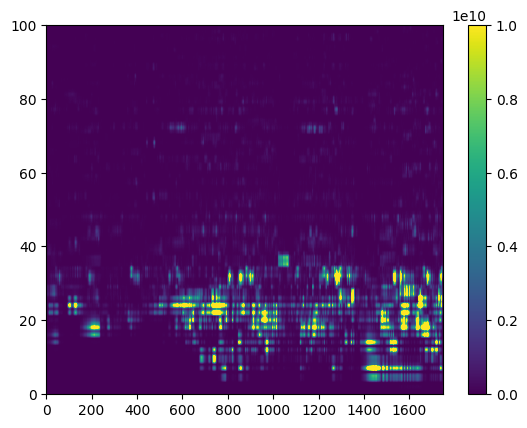

In [63]:
# Plot and save the mel spectrogram
plt.figure()
plt.imshow(spectrogram, cmap='viridis', aspect='auto', origin='lower', vmax=1e10)
plt.ylim(0, 100)
plt.colorbar()

# Save the spectrogram to an image file
# plt.savefig('mel_spectrogram.png')

# Display the plot
plt.show()